In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

In [0]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Clean the data**

In [0]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

**Describe the data**

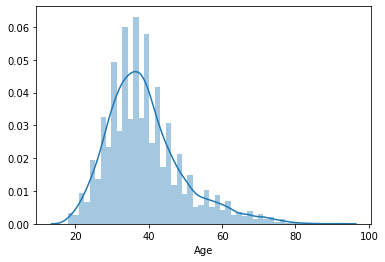

In [7]:
#Search distribution from age
ax = sns.distplot(df['Age'])

In [8]:
#Search correlation about features
df.corr( method='pearson', min_periods=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [0]:
df.corr( method='kendall', min_periods=1)

In [0]:
df.corr( method='spearman', min_periods=1)

In [0]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])


In [0]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

In [0]:
plt.figure(figsize=(8,8))
sns.countplot(x='Geography',hue='Exited',data=df)
plt.title('Number of cust. by Country')
plt.show()

In [0]:
df['Geography'].value_counts()

In [0]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Balance',hue='Exited',data=df)
plt.title('Balance compared to Country of Origin')
plt.show()

In [0]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Age',hue='Exited',data=df)
plt.title('Age compared to Country of Origin')
plt.show()

In [0]:
#To save full data complete before split per geography
data_complete=df
df = data_complete

In [0]:
# df=pd.get_dummies(df)
# df
#!pip install tensorflow==2.2.0rc2


**Make a prediciton**

In [0]:
from sklearn.model_selection import train_test_split

y = df['Exited']
X = df.drop('Exited',axis=1)

X = pd.get_dummies(X,drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)


**Feature Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Create the Artificial Neural Network**

In [0]:
 
import keras
from keras.models import Sequential
from keras.layers import Dense


In [0]:
# Create the layers
classifier = Sequential()

# Adding the first hidden layer
classifier.add(Dense(units=6,
                     kernel_initializer='uniform',
                     activation='relu',
                     input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6,
                     kernel_initializer='uniform',
                     activation='relu'))  # don't need to specify the input_dim for subsequent layers

# Add the final output layer
classifier.add(Dense(units=1,   # we have a binary outcome Yes/No
                     kernel_initializer = 'uniform',
                     activation = 'sigmoid'))  # for more than 2 categories use 'softmax'

In [0]:
# Compile the ANN
classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [0]:
# Fit the ANN to the data
#print(X_train)
#print([y_train.to_numpy()])
#y_train

classifier.fit(X_train, y_train, batch_size=10, epochs=100)



In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print ("Accuracy on test set : ", accuracy_score(y_test, y_pred))

print ("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))

In [0]:
# Select one row and edit it

X_cust = X[:1].copy()

X_cust['CreditScore'] = 600
X_cust['Age'] = 40
X_cust['Tenure'] = 3
X_cust['Balance'] = 60000
X_cust['NumOfProducts'] = 2
X_cust['EstimatedSalary'] = 50000
X_cust['Gender_Male'] = 1

X_cust



In [0]:
# Scale the data
X_cust = sc.transform(X_cust)
X_cust

In [0]:
# Predict if we should retain the customer

pred = classifier.predict(X_cust)

decision = np.where (pred > 0.5, "Yes","No")

print ("Should we retain the customer? : ", decision)

In [0]:
df.columns

In [0]:
df.head(5)